In [1]:
import pandas as pd
import numpy as np

In [2]:
#import the relevent packages
import re

#install the assortment dataset, read in the data and regex split the input by lines\

f1 = open("assortment.txt")  #change address accordingly
assString = f1.read()
assList = re.split("\n",assString)

#convert the list to dataframe 
df = pd.DataFrame({'Assortment' :assList}) 
df.head(10)
df = df.dropna()
df.describe()

#install the probability dataset, read in the data and regex split the input by lines
f2 = open("probability.txt")    #change address accordingly
msString = f2.read()
msList = re.split("\n",msString)

#convert the list to dataframe 
ms = pd.DataFrame({'prob' :msList}) 
ms.head(10)
ms = ms.dropna()
ms.describe()

#bind two df together
df["Probability"] = ms["prob"]
df.describe()

#remove the empty cells
df = df[df["Assortment"]!=""]
df.describe()

#function to change string to array
def toArr(x):
    return [float(i) for i in x[1:-1].split(",")]

#apply this function vertically to all columns
df = df.applymap(lambda x: toArr(x))
df

,Assortment,Probability
0,"[0.0, 2.0]","[0.6171762553809882, 0.382823744619012]"
1,"[0.0, 22.0, 27.0]","[0.49010203287014026, 0.3856208197783525, 0.12..."
2,"[0.0, 7.0, 17.0, 22.0]","[0.17383055343275639, 0.44812960860117884, 0.2..."
3,"[0.0, 17.0, 7.0, 21.0, 14.0]","[0.1338762504510885, 0.1933610050447225, 0.365..."
4,"[0.0, 7.0, 2.0, 25.0, 30.0, 13.0]","[0.09520137647807961, 0.4258881190119289, 0.02..."
...,...,...
2495,"[0.0, 13.0]","[0.37037705537265336, 0.6296229446273469]"
2496,"[0.0, 23.0, 17.0]","[0.25241095695520893, 0.10976818151988744, 0.6..."
2497,"[0.0, 11.0, 10.0, 29.0]","[0.13702096921422796, 0.17458857209162085, 0.6..."
2498,"[0.0, 16.0, 25.0, 13.0, 1.0]","[0.167781680054737, 0.29015312192773385, 0.148..."


In [3]:
df_2 = df[df['Assortment'].apply(len) <= 2]
df_2 = df_2.sort_values('Assortment')
df_2['Assortment'][0][1]

2.0

In [4]:
df_2

,Assortment,Probability
2110,"[0.0, 1.0]","[0.654406942982526, 0.34559305701747417]"
2170,"[0.0, 1.0]","[0.654406942982526, 0.34559305701747417]"
2130,"[0.0, 1.0]","[0.654406942982526, 0.34559305701747417]"
1580,"[0.0, 1.0]","[0.654406942982526, 0.34559305701747417]"
1045,"[0.0, 1.0]","[0.654406942982526, 0.34559305701747417]"
...,...,...
630,"[0.0, 30.0]","[0.7116249158598886, 0.2883750841401116]"
1410,"[0.0, 30.0]","[0.7116249158598886, 0.2883750841401116]"
475,"[0.0, 30.0]","[0.7116249158598886, 0.2883750841401116]"
195,"[0.0, 30.0]","[0.7116249158598886, 0.2883750841401116]"


In [5]:
df_01= df_2[df_2['Assortment'].apply(lambda x: x[1] == 1)]
df_02= df_2[df_2['Assortment'].apply(lambda x: x[1] == 2)]
df_03= df_2[df_2['Assortment'].apply(lambda x: x[1] == 3)]
df_04= df_2[df_2['Assortment'].apply(lambda x: x[1] == 4)]
df_05= df_2[df_2['Assortment'].apply(lambda x: x[1] == 5)]
df_06= df_2[df_2['Assortment'].apply(lambda x: x[1] == 6)]

In [6]:
for i in range(1, 6):
    df_name = 'df_0{}'.format(i)  
    df_length = len(eval(df_name))  
    print(df_name, df_length)

df_01 27
df_02 14
df_03 14
df_04 7
df_05 8


In [7]:
df_01.head(1) # check the unique value

,Assortment,Probability
2110,"[0.0, 1.0]","[0.654406942982526, 0.34559305701747417]"


In [8]:
unique_probs_01 = df_01['Probability'].apply(tuple).unique()
print('Unique probabilities for 1:', unique_probs_01)
unique_probs_02 = df_02['Probability'].apply(tuple).unique()
print('Unique probabilities for 2:', unique_probs_02)
unique_probs_03 = df_03['Probability'].apply(tuple).unique()
print('Unique probabilities for 3:', unique_probs_03)
unique_probs_04 = df_04['Probability'].apply(tuple).unique()
print('Unique probabilities for 4:',unique_probs_04)
unique_probs_05 = df_05['Probability'].apply(tuple).unique()
print('Unique probabilities for 5:', unique_probs_05)

Unique probabilities for 1: [(0.654406942982526, 0.34559305701747417)]
Unique probabilities for 2: [(0.6171762553809882, 0.382823744619012)]
Unique probabilities for 3: [(0.5770967690161186, 0.42290323098388155)]
Unique probabilities for 4: [(0.5375828219032884, 0.46241717809671173)]
Unique probabilities for 5: [(0.49597170607353724, 0.5040282939264629)]


In [9]:
unique_probs_01[0][1]

0.34559305701747417

[0.34559305701747417, 0.382823744619012, 0.42290323098388155, 0.46241717809671173, 0.5040282939264629]


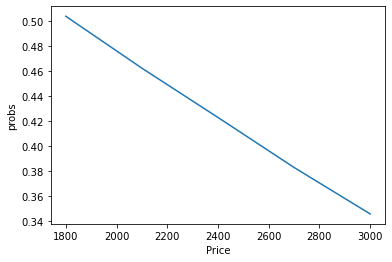

[1036.7791710524225, 1033.6241104713324, 1014.9677543613158, 971.0760740030946, 907.2509290676331]


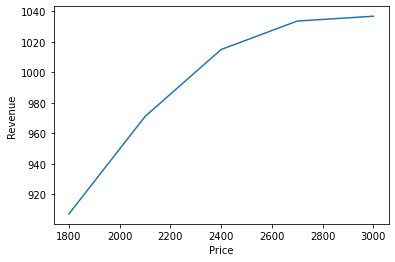

In [10]:
import matplotlib.pyplot as plt

prices = [3000, 2700, 2400, 2100, 1800]
probs = [unique_probs_01[0][1],unique_probs_02[0][1],unique_probs_03[0][1],unique_probs_04[0][1],unique_probs_05[0][1]]
print(probs)


plt.plot(prices, probs)
plt.xlabel('Price')
plt.ylabel('probs')
plt.show()


revenues = list(map(lambda x, y: x * y, prices, probs))

# Plot the revenue values
plt.plot(prices, revenues)
plt.xlabel('Price')
plt.ylabel('Revenue')
print (revenues)

In [11]:
# from scipy.special import expit

beta = [0.3212892703550074, 0.4767749032618438, -0.023165723309799064, -0.00046576011899774174] # from quesiton (a)

x_a = [4, 3.2, 95] # from the problem description

a = np.dot(beta[:3], x_a)
b = beta[3]
print('Expected utility is %f%fp' % (a,b))

def R(p):
    # watch for overflow!
    return (p*np.exp(-a-b*p))/(np.exp(-a-b*p)+1)
    # return p*np.exp(a+b*p)/(np.exp(a+b*p)+1)
    # return p*expit(a+b*p)

Expected utility is 0.610093-0.000466p


In [12]:
print(a,b)

0.6100930574270187 -0.00046576011899774174


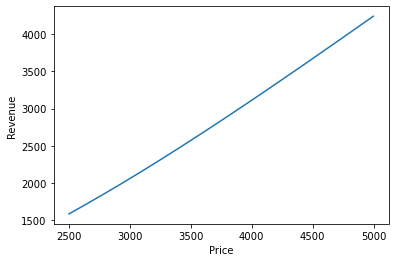

In [13]:
import matplotlib.pyplot as plt
# Plot revenue for n prices uniformly distributed between up and low.
up = 5000
low = 2500
n = 1000
price = np.array(range(0,n,1))/n*(up-low)+low

revenue = [R(p) for p in price]
# print(revenue)
plt.plot(price,revenue)
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.show()

In [14]:
beta = [0.32343713764458615, 0.5201633882209148, -0.023956546654068895, -0.0005299884189021755]
x_a = [4, 3.2, 95]
x_b = [8, 2.9, 60]
x_c = [8, 2.9, 95]
x_d = [4, 2.9, 60]
x_e = [4, 3.2, 60]
x_f = [4, 3.2, 135]
b = beta[3]

u_a = np.dot(beta[:3], x_a)+2700*b
u_b = np.dot(beta[:3], x_b)+2400*b
u_c = np.dot(beta[:3], x_c)+2700*b
u_d = np.dot(beta[:3], x_d)+2100*b
u_e = np.dot(beta[:3], x_e)+2400*b
u_f = np.dot(beta[:3], x_f)+2400*b


u_a,u_b,u_c,u_d,

(-0.7485692702871469,
 1.386605922387987,
 0.3891302638249232,
 0.2518538974802951)

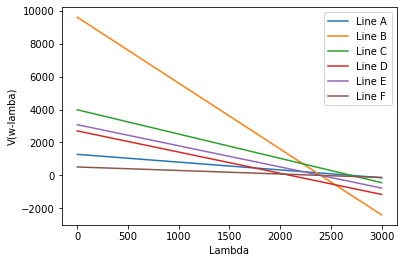

Line A intersects Line B at x=2356.71343, y=162.38926
Line A intersects Line C at x=2699.39880, y=0.28439
Line A intersects Line D at x=1749.49900, y=449.62772
Line A intersects Line E at x=2224.44890, y=224.95606
Line A intersects Line F at x=2939.87976, y=-113.47341
Line B intersects Line C at x=2224.44890, y=702.42322
Line B intersects Line D at x=2537.07415, y=-548.46745
Line B intersects Line E at x=2398.79760, y=4.81112
Line B intersects Line F at x=2398.79760, y=4.81112
Line C intersects Line F at x=2747.49499, y=-70.08820
Line D intersects Line F at x=2038.07615, y=79.65934
Line E intersects Line F at x=2398.79760, y=1.54223
[2356.7134268537075, 2699.3987975951904, 1749.4989979959919, 2224.448897795591, 2939.879759519038, 2224.448897795591, 2537.074148296593, 2398.797595190381, 2398.797595190381, 2747.49498997996, 2038.0761523046092, 2398.797595190381]


In [15]:
beta = [0.32343713764458615, 0.5201633882209148, -0.023956546654068895, -0.0005299884189021755]
x_a = [4, 3.2, 95]
x_b = [8, 2.9, 60]
x_c = [8, 2.9, 95]
x_d = [4, 2.9, 60]
x_e = [4, 3.2, 60]
x_f = [4, 3.2, 135]
b = beta[3]

u_a = np.dot(beta[:3], x_a)+2700*b
u_b = np.dot(beta[:3], x_b)+2400*b
u_c = np.dot(beta[:3], x_c)+2700*b
u_d = np.dot(beta[:3], x_d)+2100*b
u_e = np.dot(beta[:3], x_e)+2400*b
u_f = np.dot(beta[:3], x_f)+2400*b




import numpy as np
import matplotlib.pyplot as plt


lamb_range = np.linspace(0, 3000, 500)


w_a = np.exp(u_a)
w_b = np.exp(u_b)
w_c = np.exp(u_c)
w_d = np.exp(u_d)
w_e = np.exp(u_e)
w_f = np.exp(u_f)

y_a = w_a*(2700-lamb_range)
y_b = w_b*(2400-lamb_range)
y_c = w_c*(2700-lamb_range)
y_d = w_d*(2100-lamb_range)
y_e = w_e*(2400-lamb_range)
y_f = w_f*(2400-lamb_range)


plt.plot(lamb_range, y_a, label='Line A')
plt.plot(lamb_range, y_b, label='Line B')
plt.plot(lamb_range, y_c, label='Line C')
plt.plot(lamb_range, y_d, label='Line D')
plt.plot(lamb_range, y_e, label='Line E')
plt.plot(lamb_range, y_f, label='Line F')



plt.xlabel('Lambda')
plt.ylabel('V(w-lamba)')
plt.legend()
#plt.ylim(0, 3000)

plt.show()

# Find the intersection points
lines = [y_a, y_b, y_c, y_d, y_e, y_f]
names = ['Line A', 'Line B', 'Line C', 'Line D', 'Line E', 'Line F']
intersections = []
lamb =[]
for i in range(len(lines)):
    for j in range(i+1, len(lines)):
        x = np.argwhere(np.diff(np.sign(lines[i] - lines[j]))).flatten()
        if len(x) > 0:
            x = x[0]
            intersections.append((names[i], names[j], lamb_range[x], lines[i][x]))
            lamb.append(lamb_range[x])

# Print the intersection points and which lines intersect
for i in range(len(intersections)):
    print(f"{intersections[i][0]} intersects {intersections[i][1]} at x={intersections[i][2]:.5f}, y={intersections[i][3]:.5f}")
print (lamb)

In [16]:
print(intersections[0][2]) # this is the x value

2356.7134268537075


We want to find the top 3 ranking line based on the x value, where x value is the intersection value - 0.1`

In [17]:
    inter = intersections[0][2]
    xCoordi = inter - 0.1
    y_a = w_a*(2700-xCoordi)
    y_b = w_b*(2400-xCoordi)
    y_c = w_c*(2700-xCoordi)
    y_d = w_d*(2100-xCoordi)
    y_e = w_e*(2400-xCoordi)
    y_f = w_f*(2400-xCoordi)
    lineDic = {
        y_a:"a",
        y_b:"b",
        y_c:"c",
        y_d:"d",
        y_e:"e",
        y_f:"f",
    }
    
    outPut = [y_a, y_b, y_c, y_d, y_e, y_f]
    outPut.sort(reverse=True)
    outPut = outPut[::2]
    assort = [lineDic.get(i) for i in outPut]
    print(assort)
    print(outPut)

['c', 'a', 'f']
[506.7344564134116, 162.4365684660685, 9.228674292816526]


In [18]:
intersecX = [intersections[i][2] for i in range(len(intersections))]
intersecX

[2356.7134268537075,
 2699.3987975951904,
 1749.4989979959919,
 2224.448897795591,
 2939.879759519038,
 2224.448897795591,
 2537.074148296593,
 2398.797595190381,
 2398.797595190381,
 2747.49498997996,
 2038.0761523046092,
 2398.797595190381]

In [33]:
def selectTop3(inter):
    xCoordi = inter - 0.1
    y_a = w_a*(2700-xCoordi)
    y_b = w_b*(2400-xCoordi)
    y_c = w_c*(2700-xCoordi)
    y_d = w_d*(2100-xCoordi)
    y_e = w_e*(2400-xCoordi)
    y_f = w_f*(2400-xCoordi)
    lineDic = {
        y_a:"a",
        y_b:"b",
        y_c:"c",
        y_d:"d",
        y_e:"e",
        y_f:"f",
    }
    
    outPut = [y_a, y_b, y_c, y_d, y_e, y_f]
    outPut.sort(reverse=True)
    outPut = outPut[::2]
    outPut = [i for i in outPut if i >=0]

    assort = [lineDic.get(i) for i in outPut] #remove negative from list
    print("For intersection x = "+ str(inter))
    print("Selected products are")
    print(assort)
    print("Their y-values are")
    print(outPut)
    print("____________________")
    return assort

In [ ]:
#sum (wv)/ 1 + sum(v)

In [31]:
selectTop3(2699.3987975951904)

For intersection x = 2699.3987975951904
Selected products are
['c']
Their y-values are
[1.0347621229951909]
____________________


In [35]:
bigS = []
for i in intersecX:
    bigS.append(selectTop3(i))

For intersection x = 2356.7134268537075
Selected products are
['c', 'a', 'f']
Their y-values are
[506.7344564134116, 162.4365684660685, 9.228674292816526]
____________________
For intersection x = 2699.3987975951904
Selected products are
['c']
Their y-values are
[1.0347621229951909]
____________________
For intersection x = 1749.4989979959919
Selected products are
['b', 'e', 'a']
Their y-values are
[2603.2149426302167, 834.4751317156617, 449.6750217433613]
____________________
For intersection x = 2224.448897795591
Selected products are
['b', 'e', 'f']
Their y-values are
[702.8233472428119, 225.29396080936587, 37.36240716575788]
____________________
For intersection x = 2939.879759519038
Selected products are
[]
Their y-values are
[]
____________________
For intersection x = 2224.448897795591
Selected products are
['b', 'e', 'f']
Their y-values are
[702.8233472428119, 225.29396080936587, 37.36240716575788]
____________________
For intersection x = 2537.074148296593
Selected products ar

In [36]:
bigS

[['c', 'a', 'f'],
 ['c'],
 ['b', 'e', 'a'],
 ['b', 'e', 'f'],
 [],
 ['b', 'e', 'f'],
 ['c'],
 ['c', 'b', 'f'],
 ['c', 'b', 'f'],
 [],
 ['b', 'e', 'd'],
 ['c', 'b', 'f']]

In [42]:
bigS[0]
wvlist = [] #[0] is the w; [1] is the v
for i in bigS[0]:
    if i == 'a':
        w = 2700
        v = w_a
    elif i == 'b':
        w = 2400
        v = w_b
    elif i == 'c':
        w = 2700
        v = w_c
    elif i == 'd':
        w = 2100
        v = w_d
    elif i == 'e':
        w = 2400
        v = w_e
    elif i == 'f':
        w = 2400
        v = w_f
    wvlist.append([w,v])


In [44]:
wvlist

[[2700, 1.4756967687188174],
 [2700, 0.47304286529824774],
 [2400, 0.21270807126663224]]

In [47]:
upper = 0
lower = 1
for i in wvlist:
    nomi = i[0]*i[1]
    upper += nomi
    lower += i[1]

In [49]:
upper 

3.1614477052836976

In [50]:
lower

3.1614477052836976

In [ ]:
bigS[0]
wvlist = [] #[0] is the w; [1] is the v
for i in bigS[0]:
    if i == 'a':
        w = 2700
        v = w_a
    elif i == 'b':
        w = 2400
        v = w_b
    elif i == 'c':
        w = 2700
        v = w_c
    elif i == 'd':
        w = 2100
        v = w_d
    elif i == 'e':
        w = 2400
        v = w_e
    elif i == 'f':
        w = 2400
        v = w_f
    wvlist.append([w,v])
upper = 0
lower = 1
for i in wvlist:
    nomi = i[0]*i[1]
    upper += nomi
    lower += i[1]

In [62]:
zList = []
for j in bigS:
    wvlist = [] #[0] is the w; [1] is the v
    for i in j:
        if i == 'a':
            w = 2700
            v = w_a
        elif i == 'b':
            w = 2400
            v = w_b
        elif i == 'c':
            w = 2700
            v = w_c
        elif i == 'd':
            w = 2100
            v = w_d
        elif i == 'e':
            w = 2400
            v = w_e
        elif i == 'f':
            w = 2400
            v = w_f
        wvlist.append([w,v])
    upper = 0
    lower = 1
    for w in wvlist:
        nomi = w[0]*w[1]
        upper += nomi
        lower += w[1]
    Z = upper/lower
    zList.append(Z)

In [60]:
zList

[1825.7763281167495,
 1609.3979383439353,
 2065.810745125672,
 2030.574655548404,
 0.0,
 2030.574655548404,
 1609.3979383439353,
 2107.415097186814,
 2107.415097186814,
 0.0,
 2031.9919844041149,
 2107.415097186814]

In [66]:
result = {
    "assortment" :bigS,
    "Z" : zList
}
result = pd.DataFrame(data = result)
result

,assortment,Z
0,"[c, a, f]",1825.776328
1,[c],1609.397938
2,"[b, e, a]",2065.810745
3,"[b, e, f]",2030.574656
4,[],0.000000
5,"[b, e, f]",2030.574656
6,[c],1609.397938
7,"[c, b, f]",2107.415097
8,"[c, b, f]",2107.415097
9,[],0.000000


In [70]:
result = result.sort_values(by = ['assortment'],ascending=False)

In [71]:
result

,assortment,Z
7,"[c, b, f]",2107.415097
8,"[c, b, f]",2107.415097
11,"[c, b, f]",2107.415097
0,"[c, a, f]",1825.776328
1,[c],1609.397938
6,[c],1609.397938
3,"[b, e, f]",2030.574656
5,"[b, e, f]",2030.574656
10,"[b, e, d]",2031.991984
2,"[b, e, a]",2065.810745


In [72]:
result.head(1)

,assortment,Z
7,"[c, b, f]",2107.415097
